# **Mini Projeto – Roof Imóveis**


# 1.OBJETIVO DO NEGÓCIO
 
Nossa equipe, contratada pela empresa Roof Imóveis, realizará uma consultoria estratégica, que por meio de uma análise crítica e aprofundada em negócios imobiliários, recomendará os melhores investimentos para expandir internacionalmente seus negócios.
 
Analisaremos os dados disponibilizados, colhendo as informações relevantes e, ao final, auferindo os insights, fazer um modelo que indicará as 5 (cinco) melhores opções de investimento com maior retorno financeiro.
 
Ao fim de evitar dispêndios financeiros não lucrativos, serão demonstrados ainda os 5 (cinco) imóveis com os piores indicadores e menor probabilidade de retornos financeiros.  
 
Para o melhor entendimento e esclarecimento das indicações serão expostos com precisão as métricas utilizadas para o desenvolvimento dos modelos de análise e das referidas recomendações, ressaltando as passagens mais complexas e insights obtidos durante a resolução do projeto.

# 2.DADOS
 
Os dados utilizados foram extraídos das seguintes fontes:
 
https://www.kaggle.com/harlfoxem/housesalesprediction
 
https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/
 

Numa primeira análise é possível verificar que os dados apresentam as vendas de imóveis na região e suas características no período de 12(doze) meses, entre maio de 2014 a maio de 2015.


# 3.DICIONÁRIO DOS DADOS
 
As features disponíveis no dataset apresentam um total de 21 atributos e 21613 registros.:
 
-       Id – Identificador único do imóvel
-       Date – Data de venda
-      Price – Preço de venda
-       Bedrooms – Número de quartos
-       Bathrooms – Números de banheiros
-       Sqft_liv – Tamanho da área habitável em ft²
-       Sqft_lot – Tamanho do terreno em ft²
-       Floors – Número de andares
-       Waterfront – Indicativo se o imóvel é a beira-mar
-       View – Grau de quão belo é a vista do imóvel (0 a 4)
-       Condition – Condição da casa (1 a 5)
-       Grade – Classificação por qualidade de material utilizado na construção
-       Sqft_above – Área acima do solo em ft²
-       Sqft_basmt – Área abaixo do solo em ft²
-       Yr_built – Ano de Construção
-       Yr_renov – Ano de restauração (Caso não haja restauração: 0)
-       Zipcode – Zip Code 5 (similar ao CEP brasileiro)
-       Lat – Latitude
-       Long – Longitude
-       Squft_liv15 – Média da área habitável dos 15 imóveis mais próximos em ft²
-       Squft_lot15 – Média da área do lote dos 15 imóveis mais próximos em ft²

Além dos registros listados acima, foram criados os demais atributos para análise: 
-       Cities – Cidade na qual o imóvel está localizado
-       Profit – Lucro obtido com a revenda do imóvel
-       Sqft_lot_price_x –  Valor do pé quadrado do lote
-       Sqft_living_price – Valor do pé quadrado da área construída do lote
-       Sqft_lot_price_y –  Valor do pé quadrado da cidade (média do pé quadrado de todos os lotes)

#4.COLETA DE DADOS

In [ ]:
# Instalando as Bibliotecas
!pip install pandas
!pip install numpy
!pip install uszipcode
!pip install matplotlib
!pip install folium
!pip instal seaborn

In [ ]:
#Importando as Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import uszipcode
import seaborn as sns
import plotly.express as px
import folium 
from folium.plugins import HeatMap


In [ ]:
#Carregando o DataSet
url = "https://raw.githubusercontent.com/sostenesdev/analise-de-lucro-vendas-king/main/kc_house_data.csv"
table = pd.read_csv(url)
DF = pd.DataFrame(table)

In [ ]:
# Verificando as informações do dataset
DF.info()

In [ ]:
# Verificando as dimensões do dataset
DF.shape

#5.LIMPEZA DOS DADOS

In [ ]:
#Verificando se há dados faltantes
DF.isnull().sum()

In [ ]:
# Verificando se há valores duplicados
DF.duplicated().sum()

In [ ]:
# Validação de valores de elementos em tabela
DF.nunique().sort_values()

#6.EXPLORAÇÃO DOS DADOS

In [ ]:
#Adição da coluna 'Cities' com a cidade de cada imóvel

cities = []
from uszipcode import SearchEngine
engine = SearchEngine()
for x in table.zipcode.values:
  zipcode = engine.by_zipcode(x)
  cities.append(zipcode.major_city)
DF['cities'] = cities
DF.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,cities
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Seattle
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Seattle
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Kenmore
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Seattle
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Sammamish


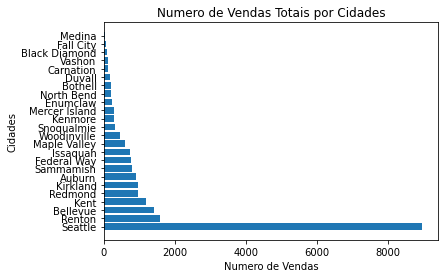

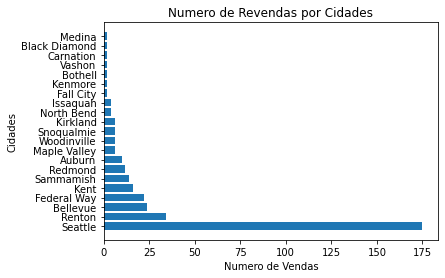

In [ ]:
#Verificação do Número de Vendas e Revendas por Cidade*

counts = DF['id'].value_counts()
DFresale=DF[DF.apply(lambda x: counts[x['id']] > 1.0, axis=1)] 
DFresale

sale_number = DF['cities'].value_counts().rename_axis('Cities').reset_index(name='Numero de vendas')
plt.barh(sale_number['Cities'].tolist() ,sale_number['Numero de vendas'].tolist()) 
plt.ylabel("Cidades") 
plt.xlabel("Numero de Vendas")  
plt.title("Numero de Vendas Totais por Cidades")
plt.show()

resale_number = DFresale['cities'].value_counts().rename_axis('Cities').reset_index(name='Numero de vendas')
plt.barh(resale_number['Cities'].tolist() ,resale_number['Numero de vendas'].tolist()) 
plt.ylabel("Cidades") 
plt.xlabel("Numero de Vendas")  
plt.title("Numero de Revendas por Cidades")
plt.show()


In [ ]:
#Verificação da lucratividade dos imóveis Revendidos

grouped = DFresale.groupby('id')

outputlist = []
for local_id, group in grouped :
    #obtendo as linhas de cada imóvel ordenados por data da mais nova para mais antiga
    # (importante para cálculo do lucro)
    local = DFresale[DFresale["id"] == local_id].sort_values(by="date", ascending=False).copy()
    profit = 0
    #calculando o lucro de cada imóvel
    profit = local.iloc[0]['price']*100/local.iloc[-1]['price'] -100
    #adicionando resultado do lucro em uma lista
    outputlist.append([local_id , local.iloc[0]['cities'],local.iloc[0]['condition'],
                       local.iloc[0]['yr_renovated'], profit , local.iloc[0]['lat'],local.iloc[0]['long']])
profit_df = pd.DataFrame(outputlist, columns = ['id','cities' ,'condition','yr_renovated','profit','lat', 'long'])
output = []
profit_df.sort_values(by="profit", ascending=False)



,id,cities,condition,yr_renovated,profit,lat,long
46,2023049218,Seattle,1,0,321.800948,47.4611,-122.324
126,7129304540,Seattle,3,0,230.827068,47.5192,-122.266
73,3333002450,Seattle,2,0,196.969697,47.5427,-122.288
53,2422049104,Kent,3,0,176.470588,47.3813,-122.243
83,3883800011,Seattle,3,0,168.170732,47.4987,-122.341
...,...,...,...,...,...,...,...
88,4139420590,Bellevue,3,0,-1.030928,47.5521,-122.115
63,2767603612,Seattle,3,0,-2.200000,47.6719,-122.382
159,8682262400,Redmond,3,0,-2.337209,47.7176,-122.033
61,2726049071,Seattle,3,0,-3.931373,47.7076,-122.284


In [ ]:

#heatmap do lucro por imóvel

m2 = folium.Map(location=[47.58766, -121.83072], zoom_start=9,tiles='Stamen Terrain')

lat = profit_df.lat.tolist()
lng = profit_df.long.tolist()
profit = profit_df.profit.tolist()

HeatMap(list(zip(lat, lng, profit))).add_to(m2)
m2

In [ ]:
#Verificação do valor medio do FT² por propriedade.

grouped = DFresale.groupby('id')

outputlist = []
for local_id, group in grouped :
    #obtendo as linhas de cada imóvel ordenados por data da mais nova para mais antiga (importante para calculo do lucro)
    local = DFresale[DFresale["id"] == local_id].sort_values(by="date", ascending=False).copy()
    profit = 0
    #calculando o lucro de cada imovel
    profit = local.iloc[0]['price']*100/local.iloc[-1]['price'] -100
    #valor pé quadrado terreno
    sqft_lot_price = local['price'].mean()/local.iloc[0]['sqft_lot']
    #valor pé quadrado area construida
    sqft_living_price = local['price'].mean()/local.iloc[0]['sqft_living']
    #adicionando resultado do lucro em uma lista
    outputlist.append([local_id, profit, sqft_lot_price,sqft_living_price, local.iloc[0]['lat'], local.iloc[0]['long']])
profit_df2 = pd.DataFrame(outputlist, columns = ['id', 'profit','sqft_living_price','sqft_lot_price','lat', 'long'])
df_com_profit = pd.merge(DFresale,profit_df2,on='id',how='left')
grouped_city_ft_mean = df_com_profit.drop(['bedrooms','bathrooms','waterfront','view'],axis=1).sort_values(by=["profit","condition"], ascending=[False,False]).groupby('cities')
city_ft_mean_lot = grouped_city_ft_mean['sqft_lot_price'].mean()
city_ft_mean_living = grouped_city_ft_mean['sqft_living_price'].mean()




In [ ]:
# Verificação do valor médio do FT² por cidade.
#preço do pé quadrado por cidade (lote)
df_city_ft_mean_lot = pd.DataFrame({'cities': city_ft_mean_lot.index, 'sqft_lot_price': city_ft_mean_lot.values})
#preço do pé quadrado por cidade (área construída)
df_city_ft_mean_living = pd.DataFrame({'cities': city_ft_mean_living.index, 'sqft_living_price': city_ft_mean_living.values})

In [ ]:
# Gráfico de condição x preço (condição mais vendida)
fig  = px.scatter(DF, x = "condition", y = 'price', hover_name = "id", log_x = True, width = 800)
fig.update_traces(marker = dict(size = 20, line=dict(width = 2)), selector = dict(mode = 'markers'))
fig.update_layout(title = 'Condições da casa X Preço de venda')
fig.update_xaxes(title = 'Condições da casa')
fig.update_yaxes(title = 'Preço de venda')
fig.show()

In [ ]:
# Filtro para selecionar imóveis com a condição melhor ou igual 3
df_com_profit2 = df_com_profit.drop(['waterfront','view','floors','grade','sqft_basement','yr_renovated','yr_built','sqft_above'],axis=1)
df_com_profit2 = df_com_profit2[df_com_profit2['cities'] ==  'Seattle' ]
df_com_profit2 = df_com_profit2[df_com_profit2['condition']>= 3 ] 
df_com_profit2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,zipcode,lat_x,long_x,sqft_living15,sqft_lot15,cities,profit,sqft_living_price,sqft_lot_price,lat_y,long_y
0,6021501535,20140725T000000,430000.0,3,1.5,1580,5000,3,98117,47.6870,-122.386,1570,4500,Seattle,62.790698,113.000000,357.594937,47.6870,-122.386
1,6021501535,20141223T000000,700000.0,3,1.5,1580,5000,3,98117,47.6870,-122.386,1570,4500,Seattle,62.790698,113.000000,357.594937,47.6870,-122.386
4,7520000520,20140905T000000,232000.0,2,1.0,1240,12092,3,98146,47.4957,-122.352,1820,7460,Seattle,3.663793,19.537711,190.524194,47.4957,-122.352
5,7520000520,20150311T000000,240500.0,2,1.0,1240,12092,3,98146,47.4957,-122.352,1820,7460,Seattle,3.663793,19.537711,190.524194,47.4957,-122.352
6,3969300030,20140723T000000,165000.0,4,1.0,1000,7134,3,98178,47.4897,-122.240,1020,7138,Seattle,45.393939,28.378189,202.450000,47.4897,-122.240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,6021500970,20150407T000000,874950.0,2,1.0,1080,4000,3,98117,47.6902,-122.387,1530,4240,Seattle,153.608696,152.493750,564.791667,47.6902,-122.387
345,2724049222,20140802T000000,163800.0,2,2.5,1000,1092,3,98118,47.5419,-122.271,1330,1466,Seattle,34.310134,175.732601,191.900000,47.5419,-122.271
346,2724049222,20141201T000000,220000.0,2,2.5,1000,1092,3,98118,47.5419,-122.271,1330,1466,Seattle,34.310134,175.732601,191.900000,47.5419,-122.271
349,6300000226,20140626T000000,240000.0,4,1.0,1200,2171,3,98133,47.7076,-122.342,1130,1598,Seattle,58.333333,142.791340,258.333333,47.7076,-122.342


In [ ]:
#Cálculo de média e desvio padrão(STD - Standard Deviation)
profit_df_media = pd.merge(df_com_profit2,df_city_ft_mean_lot,on='cities',how='left')
profit_df_media[['sqft_lot_price_x']].describe().apply(lambda s: s.apply('{0:.2f}'.format))
# a média de valor por FT² foi 257,87
# o STD foi de 102,38

,sqft_lot_price_x
count,162.00
mean,257.87
std,102.38
min,112.06
25%,186.76
50%,239.35
75%,297.58
max,609.73


In [ ]:
#Explicando o desvio padrão
#foram utilizados os valores de $ 156 até $ 360 por FT² para filtrar com base no desvio padrão
profit_df_finish = profit_df_media[profit_df_media['sqft_lot_price_x']>= 156 ]
profit_df_finish = profit_df_finish[profit_df_finish['sqft_lot_price_x']<= 360 ]
profit_df_finish


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,zipcode,lat_x,long_x,sqft_living15,sqft_lot15,cities,profit,sqft_living_price,sqft_lot_price_x,lat_y,long_y,sqft_lot_price_y
0,6021501535,20140725T000000,430000.0,3,1.50,1580,5000,3,98117,47.6870,-122.386,1570,4500,Seattle,62.790698,113.000000,357.594937,47.6870,-122.386,258.737746
1,6021501535,20141223T000000,700000.0,3,1.50,1580,5000,3,98117,47.6870,-122.386,1570,4500,Seattle,62.790698,113.000000,357.594937,47.6870,-122.386,258.737746
2,7520000520,20140905T000000,232000.0,2,1.00,1240,12092,3,98146,47.4957,-122.352,1820,7460,Seattle,3.663793,19.537711,190.524194,47.4957,-122.352,258.737746
3,7520000520,20150311T000000,240500.0,2,1.00,1240,12092,3,98146,47.4957,-122.352,1820,7460,Seattle,3.663793,19.537711,190.524194,47.4957,-122.352,258.737746
4,3969300030,20140723T000000,165000.0,4,1.00,1000,7134,3,98178,47.4897,-122.240,1020,7138,Seattle,45.393939,28.378189,202.450000,47.4897,-122.240,258.737746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,1901600090,20150426T000000,390000.0,5,1.75,1940,6654,4,98166,47.4663,-122.359,2300,9500,Seattle,8.635097,56.281936,193.041237,47.4663,-122.359,258.737746
158,2724049222,20140802T000000,163800.0,2,2.50,1000,1092,3,98118,47.5419,-122.271,1330,1466,Seattle,34.310134,175.732601,191.900000,47.5419,-122.271,258.737746
159,2724049222,20141201T000000,220000.0,2,2.50,1000,1092,3,98118,47.5419,-122.271,1330,1466,Seattle,34.310134,175.732601,191.900000,47.5419,-122.271,258.737746
160,6300000226,20140626T000000,240000.0,4,1.00,1200,2171,3,98133,47.7076,-122.342,1130,1598,Seattle,58.333333,142.791340,258.333333,47.7076,-122.342,258.737746


In [ ]:
#Filtro por condição do imóvel menor ou igual a 3
df_com_profit4 = df_com_profit[df_com_profit['condition']<= 3 ] 

#Calculo de média e desvio padrão 
profit_df_media1 = pd.merge(df_com_profit4,df_city_ft_mean_lot,on='cities',how='left')
profit_df_media1[['sqft_lot_price_x']].describe().apply(lambda s: s.apply('{0:.2f}'.format))
# a média de valor por FT² foi 238,88
# o STD foi de 96.25

,sqft_lot_price_x
count,257.00
mean,238.88
std,96.25
min,112.06
25%,171.19
50%,219.40
75%,283.76
max,609.73


In [ ]:
#Explicando desvio padrão
#foram utilizados os valores de $ 143 ate $ 335 por FT² para filtrar com base no desvio padrão
profit_df_finish1 = profit_df_media1[(profit_df_media1['sqft_lot_price_x']<= 143) | (profit_df_media1['sqft_lot_price_x']>= 335) ]

#7.CONCLUSÃO

**OS 05(CINCO) IMÓVEIS INDICADOS PARA INVESTIMENTO SÃO:**

In [ ]:
#filtrando imóveis com melhor margem dentro dos parâmetros estabelecidos
grouped = profit_df_finish.groupby('id')

outputlist = []
for local_id, group in grouped :
    local = profit_df_finish[profit_df_finish["id"] == local_id]
    outputlist.append([local_id,local.iloc[0]['profit'],local.iloc[0]['price'],local.iloc[0]['sqft_lot_price_x'],local.iloc[0]['condition']])
groupbyid_df = pd.DataFrame(outputlist, columns=['id','profit %','price','sqft_lot_price_x','condition' ])
groupbyid_df.sort_values(by="profit %", ascending=False).apply(lambda s: s.apply('{0:.2f}'.format)).head(5)

,id,profit %,price,sqft_lot_price_x,condition
42,7129304540.00,230.83,133000.00,200.35,3.00
27,3883800011.00,168.17,82000.00,175.52,3.00
10,1423049019.00,144.44,90000.00,267.24,3.00
33,5132000140.00,137.14,175000.00,215.33,3.00
38,6141100320.00,132.65,245000.00,271.67,3.00


OS 05(CINCO) IMÓVEIS NÃO INDICADOS PARA INVESTIMENTO SÃO:


In [ ]:
#Filtrando imóveis com pior margem dentro dos parâmetros estabelecidos
grouped1 = profit_df_finish1.groupby('id')

outputlist = []
for local_id, group in grouped1 :
    local = profit_df_finish1[profit_df_finish1["id"] == local_id]
    outputlist.append([local_id,local.iloc[0]['profit'],local.iloc[0]['price'],local.iloc[0]['sqft_lot_price_x'],local.iloc[0]['condition'],local.iloc[0]['cities']])
groupbyid_df = pd.DataFrame(outputlist, columns=['id','profit %','price','sqft_lot_price_x','condition', 'cities' ])
groupbyid_df.sort_values(by="profit %", ascending=True).head(5)



,id,profit %,price,sqft_lot_price_x,condition,cities
9,2726049071,-3.931373,510000.0,609.725610,3,Seattle
11,2767603612,-2.200000,500000.0,383.333333,3,Seattle
0,1000102,7.142857,280000.0,120.833333,3,Auburn
25,8129700644,9.090909,715000.0,359.375000,3,Seattle
18,5332200530,11.538462,910000.0,409.574468,3,Seattle
